## Predicting the On-set of Diabetes Based on Diagnostic Measures

### Predictor Variables: 

#### •	Pregnancies: Number of times pregnant

#### •	Glucose: Plasma glucose concentration 

#### •	BloodPressure: Diastolic blood pressure (mm Hg)

#### •	SkinThickness: Triceps skin fold thickness (mm)

#### •	Insulin: 2-Hour serum insulin (mu U/ml)

#### •	BMI: Body mass index (weight in kg/(height in m)^2)

#### •	DiabetesPedigreeFunction: Diabetes pedigree function

#### •	Age: Age (years)

#### •	Outcome: Class variable (0 or 1)

#### Metrics for Evaluating Classification Models:

####  • Accuracy/Mis-classification Rate

####  • Confusion Matrix( Each row represents actual class, columns represents predicted)

####  • Classification Report( Precision = TP/(TP+FP), Recall/Senstivity=TP/TP+FP)

####  • Area Under ROC Curve(Plots Sensitivity Vs 1-Specificity, where Spec=TN/TN+FN)


(768, 9)
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean  

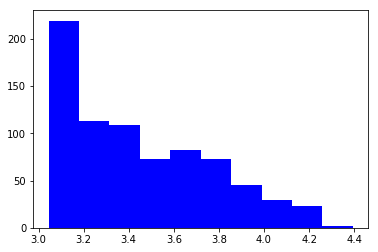

Skew is: 0.114177688266


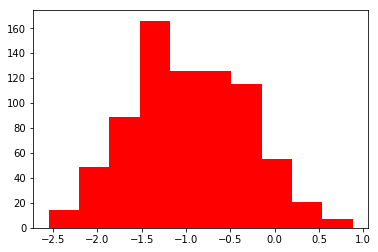

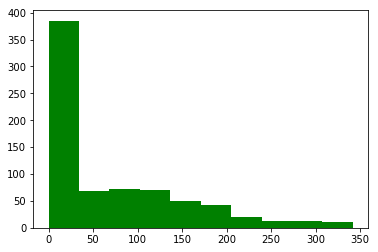

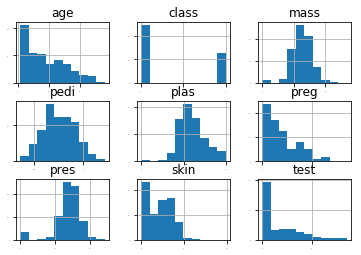

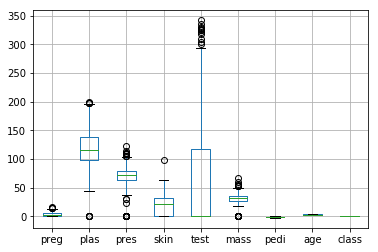

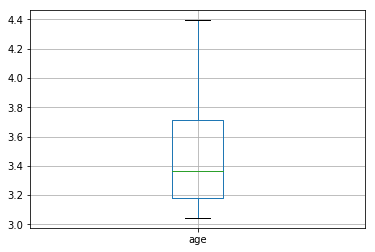

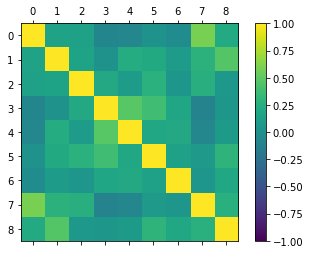

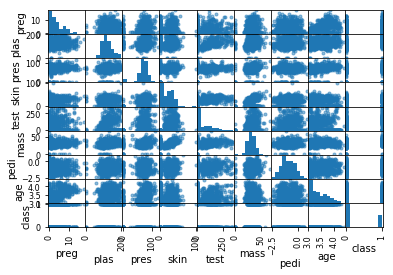

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
Explained Variance [ 0.82107479  0.10706573  0.04432162]
Components [[ -2.69503793e-03   1.00075421e-01   2.79221577e-02   9.23909558e-02
    9.90092804e-01   1.93791242e-02   1.59666100e-03  -2.26500585e-04]
 [ -2.07711978e-02  -9.82119940e-01  -1.38826857e-01   6.09731428e-02
    9.83831448e-02  -4.82237715e-02  -1.03046702e-03  -3.53876423e-03]
 [ -1.79463089e-02   1.26449466e-01  -9.40786479e-01  -2.82828400e-01
    4.26316912e-02  -1.29576739e-01  -1.35282583e-03  -2.81729696e-03]]
Model Importance using Extra Classifier [ 0.10036416  0.20165577  0.1031825   0.08149352  0.06931054  0.13540167
  0.130463    0.17812885]
Model Importance using Random Forest [ 0.08556623  0.24874713  0.10448011  0.06926422  0.06579142  0.18208555
  0.12324019  0.12082515]
Model coefficents are :  [[ 0.16543977  0.03147359 -0.01912803 -0.00321788 -0.00201942  0.07679201
   0.79730893 -0.68297

In [6]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\pimas.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename,names=names)

# First 20 rows of your data

dataset.head(20)

# dimensions of your data

print(dataset.shape)

# datatype for each attribute

print(dataset.dtypes)

# Summary Statistics

print(dataset.describe())

#Summary Statisitics of the ge variable

print(dataset.age.describe())


# Class Distribution. For categorical data only

print(dataset.groupby('class').size())

temp1=dataset['class'].value_counts(ascending=True)
print(temp1)

# Change all categorical variables to type category

    
for col in ['class']:
        dataset[col] = dataset[col].astype('category')
        
from sklearn.preprocessing import LabelEncoder
var_cat = ['class']
le = LabelEncoder()
for i in var_cat:
    dataset[i] = le.fit_transform(dataset[i])
dataset.dtypes 



# Correlations between attributes

correlations= dataset.corr(method='pearson')
print(correlations)


# skew for each attribute

print(dataset.skew())


# Log Transform the age variable for skewness
dataset.age = np.log(dataset.age)
print ("Skew is:", dataset.age.skew())
plt.hist(dataset.age, color='blue')
plt.show()


# Log Transfor the pedi variable for skewness
dataset.pedi = np.log(dataset.pedi)
print ("Skew is:", dataset.pedi.skew())
plt.hist(dataset.pedi, color='red')
plt.show()

dataset = dataset[(dataset.test >= 0) & (dataset.test <= 350)]
plt.hist(dataset.test, color='green')
plt.show()


# Understanding your data by Visulation

#Histogram

import matplotlib.pyplot as plt 

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()


# Box Plots

dataset.boxplot(ax=None, return_type='axes')
plt.show()

# Box plots of age

dataset.boxplot(column='age',  ax=None, return_type='axes')
plt.show()


#Correlation Matrix Plot

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
plt.show()


#Scatter Plot Matrix


pd.scatter_matrix(dataset)
plt.show()

# Check for Missing Values

print(dataset.apply(lambda x: sum(x.isnull()),axis=0))

# Dimensionality Reduction

# Principal Component Analysis


from sklearn.decomposition import PCA

array=dataset.values
X=array[:,0:8]
Y=array[:,8]
pca=PCA(n_components=3)
fit=pca.fit(X)

#Summarize compoenents
print("Explained Variance",fit.explained_variance_ratio_)
print("Components",fit.components_)


#Feature Importance with Extra Trees Classifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

# Print Feature Importance with Extra Tree Classifier

print("Model Importance using Extra Classifier",model.feature_importances_)


#Feature Importance with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X,Y)

# Print Feature Importance

print("Model Importance using Random Forest",model2.feature_importances_)




# Model Validation

# Split into training and validation and fit Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size=0.3
seed=7

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=test_size,random_state=seed)

#print ("Train data shape:", train.shape)
#print ("Test data shape:", test.shape)
model=LogisticRegression()
model.fit(X_train,Y_train)

# Print model coefficients

print('Model coefficents are : ',model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using logistic Regression", resultTest*100, "%")
print("Accuracy on train data using logistic Regression", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print(matrix)


from sklearn.metrics import roc_auc_score
print("AUC :",roc_auc_score(Y_test,predicted))

# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print(report)




model=RandomForestClassifier()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using RF", resultTest*100, "%")
print("Accuracy on train data using RF", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using RF",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using RF",report)



#from sklearn.lda import LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

#model=LDA()

model=LinearDiscriminantAnalysis()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using LDA", resultTest*100, "%")
print("Accuracy on train data using LDA", resultTrain*100, "%")



# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using RF",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using RF",report)


# Fit Decision Tree Model

from sklearn.tree import DecisionTreeClassifier, export_graphviz
    
        
model= DecisionTreeClassifier()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using Descison Trees", resultTest*100, "%")
print("Accuracy on train data using Descision Trees", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using Decision Tree",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using Decision Tree",report)


# Fit Linear Dsicriminant Analysis

#from sklearn.lda import LDA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.svm import SVC
    
model= SVC()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using SVM", resultTest*100, "%")
print("Accuracy on train data using SVM", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using SVM",matrix)



# Print Classification Report


#from sklearn.metrics import classification_report

#report=classification_report(Y_test, predicted) 

#print("Report using SVM",report)










